# **Data Science mega case study**

---



In [ ]:
https://www.geeksforgeeks.org/techniques-to-evaluate-accuracy-of-classifier-in-data-mining/

Step 1: Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from google.colab import drive
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


# drive.mount('/content/drive')

Step 2: Import Data

In [2]:
df = pd.read_csv('./diabetes-2-1.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Step 3: Deal with missing values

In [4]:
# Created a funtion to reduce redunancy

def check_missing_values(df):
    # Check for missing values in each column
    missing_values = df.isnull().sum()

    # Print the count of missing values for each column
    print("Missing Values:\n", missing_values)

    # Calculate the percentage of missing values for each column
    total_entries = len(df)
    percentage_missing = (missing_values / total_entries) * 100

    # Print the percentage of missing values for each column
    print("\nPercentage of Missing Values:\n", percentage_missing)

check_missing_values(df)
print("There are no missing values")




Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Percentage of Missing Values:
 Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64
There are no missing values


Visulaisation

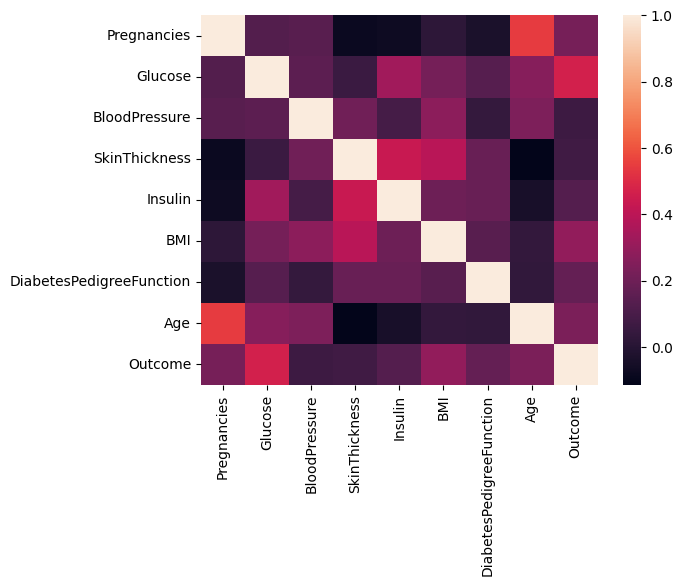

In [5]:
sns.heatmap(df.corr());

Step 5: Split the data into test and train sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training Model using different methods

## Helper funtions


In [12]:

def plot_confusion_matrix(y_true, y_pred):
    # Calculate confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()



def get_cross_val_scores(classifier, X_train, y_train, cv=5):
    """
    Perform k-fold cross-validation and return the cross-validation scores.

    Parameters:
    classifier : sklearn classifier object
        The classifier for which cross-validation needs to be performed.
    X_train : array-like of shape (n_samples, n_features)
        The input training data.
    y_train : array-like of shape (n_samples,)
        The target labels.
    cv : int, optional (default=5)
        Number of folds in cross-validation.

    Returns:
    cross_val_scores : array of shape (cv,)
        Array containing the cross-validation scores for each fold.
    """
    # Perform k-fold cross-validation
    cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=cv)

    return cross_val_scores

## Support Vector Machine

In [13]:
# Create the pipeline with StandardScaler and SVC
svm_pipe = make_pipeline(StandardScaler(), svm.SVC())

# Fit the StandardScaler on training data
svm_pipe.fit(X_train, y_train)

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf'],  # Kernel function
    'svc__gamma': [0.01, 0.1, 1]  # Hyperparameter for some kernels (e.g., rbf)
}

# Perform grid search
grid_search_svm = GridSearchCV(svm_pipe, param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

Testing The Model

In [14]:
# svr_pipe.predict(X_test)
y_pred_svm = grid_search_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of the Support Vector Machine pipeline: {accuracy_svm:.4f}")
print(classification_report(y_test, y_pred_svm))
print("Cross Validation Score",get_cross_val_scores(grid_search_svm, X_train, y_train, cv=5 ).mean())

Accuracy of the Support Vector Machine pipeline: 0.7773
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       171
           1       0.75      0.49      0.60        85

    accuracy                           0.78       256
   macro avg       0.77      0.71      0.72       256
weighted avg       0.77      0.78      0.76       256

Cross Validation Score 0.7616600038073482


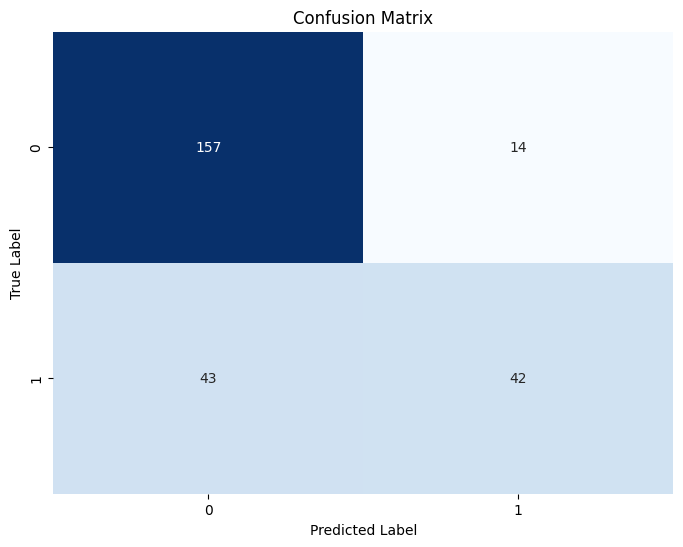

In [15]:
plot_confusion_matrix(y_test, y_pred_svm)

## Logistic Regression

In [16]:
log_reg_pipe = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))
log_reg_pipe.fit(X_train, y_train)

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logisticregression__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Solver for optimization
}

# Perform grid search
grid_search_logreg = GridSearchCV(log_reg_pipe, param_grid, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)
# log_reg_pipe.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__solver': ['liblinear',
                                                        'newton-cg', 'lbfgs',
                                                        'sag', 'saga']},
             scoring='accuracy')

Testing the model


In [17]:
y_pred_lr = log_reg_pipe.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the Logistic Regression pipeline: {accuracy_lr:.4f}")
print(classification_report(y_test, y_pred_lr))
print("Cross Validation Score",get_cross_val_scores(log_reg_pipe, X_train, y_train, cv=5 ).mean())

Accuracy of the Logistic Regression pipeline: 0.7812
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       171
           1       0.74      0.53      0.62        85

    accuracy                           0.78       256
   macro avg       0.77      0.72      0.73       256
weighted avg       0.78      0.78      0.77       256

Cross Validation Score 0.7597563297163525


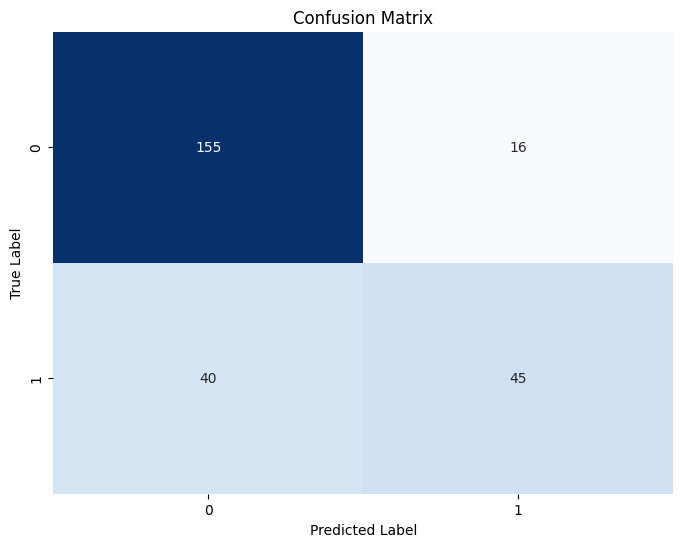

In [18]:
plot_confusion_matrix(y_test, y_pred_lr)

## Random Forest Classifier

In [19]:
rf_clf_pipe = make_pipeline(StandardScaler(),RandomForestClassifier(max_depth=2, random_state=0))
rf_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=2, random_state=0))])

Testing The Model

In [20]:
rf_clf_pipe.predict(X_test)
y_pred_rf = rf_clf_pipe.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest Classifier pipeline: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))
print("Cross Validation Score",get_cross_val_scores(rf_clf_pipe, X_train, y_train, cv=5 ).mean())

Accuracy of the Random Forest Classifier pipeline: 0.7383
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       171
           1       0.74      0.33      0.46        85

    accuracy                           0.74       256
   macro avg       0.74      0.64      0.64       256
weighted avg       0.74      0.74      0.70       256

Cross Validation Score 0.7264801066057491


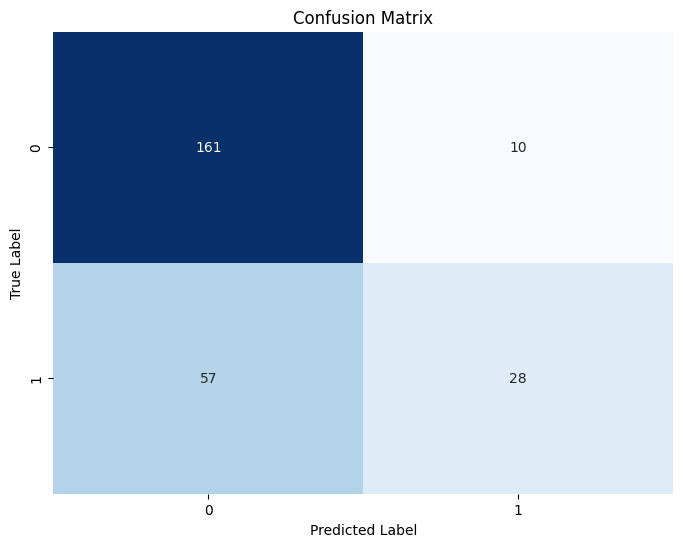

In [21]:
plot_confusion_matrix(y_test, y_pred_rf)

## Gradient Boosting Classifier

In [22]:
gb_clf_pipe = make_pipeline(StandardScaler(),GradientBoostingClassifier())
gb_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

Testing The Model

In [23]:
gb_clf_pipe.predict(X_test)
y_pred_gb = gb_clf_pipe.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of the Gradient Boosting Classifier pipeline: {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb))
print("Cross Validation Score",get_cross_val_scores(gb_clf_pipe, X_train, y_train, cv=5 ).mean())

Accuracy of the Gradient Boosting Classifier pipeline: 0.7734
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       171
           1       0.71      0.54      0.61        85

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.77      0.77      0.76       256

Cross Validation Score 0.7441652389110984


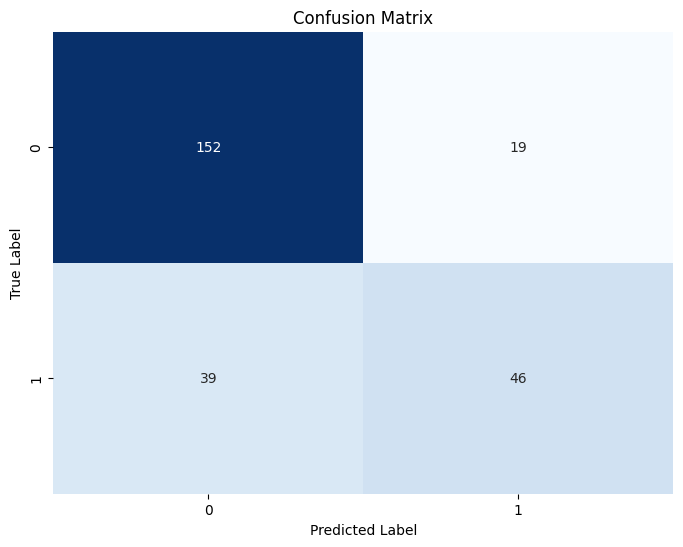

In [24]:
plot_confusion_matrix(y_test, y_pred_gb)

## Models Comparision

In [27]:
accuracy = [accuracy_svm, accuracy_lr, accuracy_rf, accuracy_gb]
models = ["Support Vector Machine", "Logistic Regression", "Random Forest Classifier", "Gradient Boosting Classifier"]

col = {"Models":models,"Accuracy":accuracy}
df=pd.DataFrame(data=col,index=models )
df

,Models,Accuracy
Support Vector Machine,Support Vector Machine,0.777344
Logistic Regression,Logistic Regression,0.781250
Random Forest Classifier,Random Forest Classifier,0.738281
Gradient Boosting Classifier,Gradient Boosting Classifier,0.773438


/var/folders/q9/xghw_0yd27j577p1m74xhhzm0000gn/T/ipykernel_58886/396584367.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Accuracy', y='Models', inner='stick', palette='Dark2')


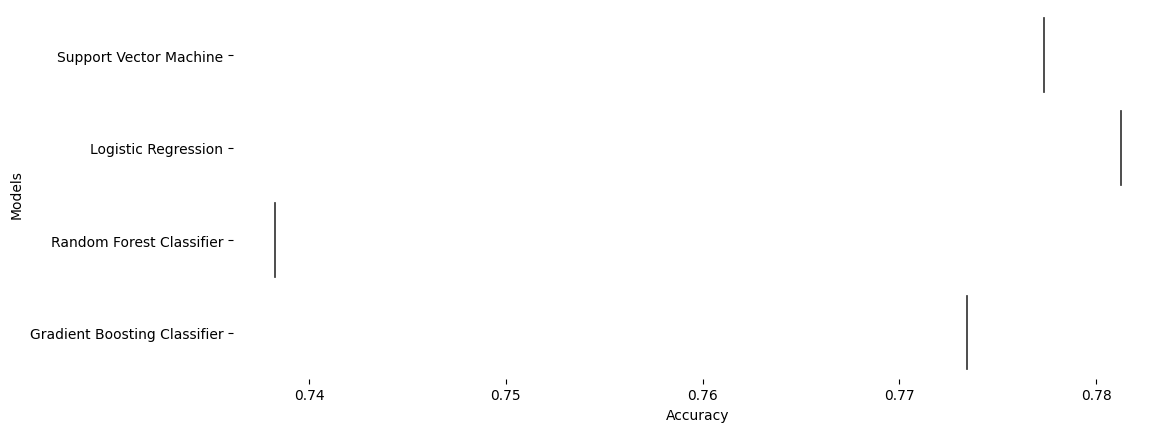

In [28]:
# @title Models vs Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Accuracy', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)